# Patient Survival Prediction

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
%matplotlib inline

## Data loading, Preprocession and EDA on Train Data

In [2]:
patient_data = pd.read_csv("https://raw.githubusercontent.com/dphi-official/Datasets/master/pharma_data/Training_set_begs.csv")
patient_data.head()

,ID_Patient_Care_Situation,Diagnosed_Condition,Patient_ID,Treated_with_drugs,Patient_Age,Patient_Body_Mass_Index,Patient_Smoker,Patient_Rural_Urban,Patient_mental_condition,A,B,C,D,E,F,Z,Number_of_prev_cond,Survived_1_year
0,22374,8,3333,DX6,56,18.479385,YES,URBAN,Stable,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,0
1,18164,5,5740,DX2,36,22.945566,YES,RURAL,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
2,6283,23,10446,DX6,48,27.510027,YES,RURAL,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0
3,5339,51,12011,DX1,5,19.130976,NO,URBAN,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
4,33012,0,12513,NaN,128,1.348400,Cannot say,RURAL,Stable,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1


In [3]:
patient_data.describe(include="all")

,ID_Patient_Care_Situation,Diagnosed_Condition,Patient_ID,Treated_with_drugs,Patient_Age,Patient_Body_Mass_Index,Patient_Smoker,Patient_Rural_Urban,Patient_mental_condition,A,B,C,D,E,F,Z,Number_of_prev_cond,Survived_1_year
count,23097.000000,23097.000000,23097.000000,23084,23097.000000,23097.000000,23097,23097,23097,21862.000000,21862.000000,21862.000000,21862.000000,21862.000000,21862.000000,21862.000000,21862.000000,23097.000000
unique,NaN,NaN,NaN,32,NaN,NaN,3,2,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,DX6,NaN,NaN,NO,RURAL,Stable,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,8606,NaN,NaN,13246,16134,23097,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,16545.712041,26.413127,6261.280772,NaN,33.209768,23.454820,NaN,NaN,NaN,0.897905,0.136355,0.185070,0.083615,0.393239,0.053700,0.000595,1.750480,0.632247
std,9532.263503,15.030865,3595.990620,NaN,19.549882,3.807661,NaN,NaN,NaN,0.302780,0.343173,0.388363,0.276817,0.488480,0.225431,0.024379,0.770311,0.482204
min,2.000000,0.000000,1.000000,NaN,0.000000,1.089300,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,8280.000000,13.000000,3181.000000,NaN,16.000000,20.205550,NaN,NaN,NaN,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,16597.000000,26.000000,6242.000000,NaN,33.000000,23.386199,NaN,NaN,NaN,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,1.000000
75%,24825.000000,39.000000,9363.000000,NaN,50.000000,26.788154,NaN,NaN,NaN,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,2.000000,1.000000


In [4]:
patient_data['Patient_mental_condition'].value_counts()

Stable    23097
Name: Patient_mental_condition, dtype: int64

In [5]:
patient_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23097 entries, 0 to 23096
Data columns (total 18 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   ID_Patient_Care_Situation  23097 non-null  int64  
 1   Diagnosed_Condition        23097 non-null  int64  
 2   Patient_ID                 23097 non-null  int64  
 3   Treated_with_drugs         23084 non-null  object 
 4   Patient_Age                23097 non-null  int64  
 5   Patient_Body_Mass_Index    23097 non-null  float64
 6   Patient_Smoker             23097 non-null  object 
 7   Patient_Rural_Urban        23097 non-null  object 
 8   Patient_mental_condition   23097 non-null  object 
 9   A                          21862 non-null  float64
 10  B                          21862 non-null  float64
 11  C                          21862 non-null  float64
 12  D                          21862 non-null  float64
 13  E                          21862 non-null  flo

In [6]:
patient_data.shape

(23097, 18)

In [7]:
patient_data.isna().sum()

ID_Patient_Care_Situation       0
Diagnosed_Condition             0
Patient_ID                      0
Treated_with_drugs             13
Patient_Age                     0
Patient_Body_Mass_Index         0
Patient_Smoker                  0
Patient_Rural_Urban             0
Patient_mental_condition        0
A                            1235
B                            1235
C                            1235
D                            1235
E                            1235
F                            1235
Z                            1235
Number_of_prev_cond          1235
Survived_1_year                 0
dtype: int64

In [8]:
patient_data.isna().sum()

ID_Patient_Care_Situation       0
Diagnosed_Condition             0
Patient_ID                      0
Treated_with_drugs             13
Patient_Age                     0
Patient_Body_Mass_Index         0
Patient_Smoker                  0
Patient_Rural_Urban             0
Patient_mental_condition        0
A                            1235
B                            1235
C                            1235
D                            1235
E                            1235
F                            1235
Z                            1235
Number_of_prev_cond          1235
Survived_1_year                 0
dtype: int64

In [9]:
[col for col in patient_data.columns if patient_data[col].dtype == 'object']

['Treated_with_drugs',
 'Patient_Smoker',
 'Patient_Rural_Urban',
 'Patient_mental_condition']

In [10]:
obj_cols = [(col, patient_data[col].value_counts()) for col in patient_data.columns if patient_data[col].dtype == 'object']
obj_cols

[('Treated_with_drugs',
  DX6                     8606
  DX5                     1909
  DX2                     1904
  DX1                     1835
  DX3                     1830
  DX4                     1792
  DX3 DX4                  448
  DX1 DX2                  448
  DX1 DX3                  424
  DX4 DX5                  423
  DX2 DX4                  419
  DX1 DX4                  408
  DX3 DX5                  407
  DX1 DX5                  402
  DX2 DX5                  400
  DX2 DX3                  398
  DX1 DX2 DX5              103
  DX1 DX3 DX5              101
  DX1 DX2 DX4               99
  DX3 DX4 DX5               96
  DX1 DX2 DX3               95
  DX2 DX3 DX5               91
  DX1 DX3 DX4               90
  DX2 DX3 DX4               87
  DX2 DX4 DX5               84
  DX1 DX4 DX5               80
  DX1 DX2 DX3 DX4           24
  DX1 DX3 DX4 DX5           24
  DX2 DX3 DX4 DX5           22
  DX1 DX2 DX4 DX5           18
  DX1 DX2 DX3 DX5           14
  DX1 DX2 DX3 D

In [11]:
# Patient_mental_condition column have only 1 value i.e stable
patient_data.drop(['Patient_mental_condition'],inplace=True, axis=1)

In [12]:
# Import label encoder 
from sklearn import preprocessing
# label_encoder object knows how to understand word labels. 
label_encoder = preprocessing.LabelEncoder()
# Encode labels in column 'Country'. 
patient_data['Treated_with_drugs']= label_encoder.fit_transform(patient_data['Treated_with_drugs']) 
patient_data['Patient_Smoker']= label_encoder.fit_transform(patient_data['Patient_Smoker']) 
patient_data['Patient_Rural_Urban']= label_encoder.fit_transform(patient_data['Patient_Rural_Urban'])
patient_data.head()

,ID_Patient_Care_Situation,Diagnosed_Condition,Patient_ID,Treated_with_drugs,Patient_Age,Patient_Body_Mass_Index,Patient_Smoker,Patient_Rural_Urban,A,B,C,D,E,F,Z,Number_of_prev_cond,Survived_1_year
0,22374,8,3333,31,56,18.479385,2,1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,0
1,18164,5,5740,16,36,22.945566,2,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
2,6283,23,10446,31,48,27.510027,2,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0
3,5339,51,12011,0,5,19.130976,1,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
4,33012,0,12513,32,128,1.348400,0,0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1


In [13]:
# Replacing Nan with 0
[patient_data[column].replace({np.nan: 0}, inplace=True) for column in patient_data.columns if patient_data[column].isna().sum()>0]

[None, None, None, None, None, None, None, None]

array([[<AxesSubplot:title={'center':'ID_Patient_Care_Situation'}>,
        <AxesSubplot:title={'center':'Diagnosed_Condition'}>,
        <AxesSubplot:title={'center':'Patient_ID'}>,
        <AxesSubplot:title={'center':'Treated_with_drugs'}>],
       [<AxesSubplot:title={'center':'Patient_Age'}>,
        <AxesSubplot:title={'center':'Patient_Body_Mass_Index'}>,
        <AxesSubplot:title={'center':'Patient_Smoker'}>,
        <AxesSubplot:title={'center':'Patient_Rural_Urban'}>],
       [<AxesSubplot:title={'center':'A'}>,
        <AxesSubplot:title={'center':'B'}>,
        <AxesSubplot:title={'center':'C'}>,
        <AxesSubplot:title={'center':'D'}>],
       [<AxesSubplot:title={'center':'E'}>,
        <AxesSubplot:title={'center':'F'}>,
        <AxesSubplot:title={'center':'Z'}>,
        <AxesSubplot:title={'center':'Number_of_prev_cond'}>],
       [<AxesSubplot:title={'center':'Survived_1_year'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

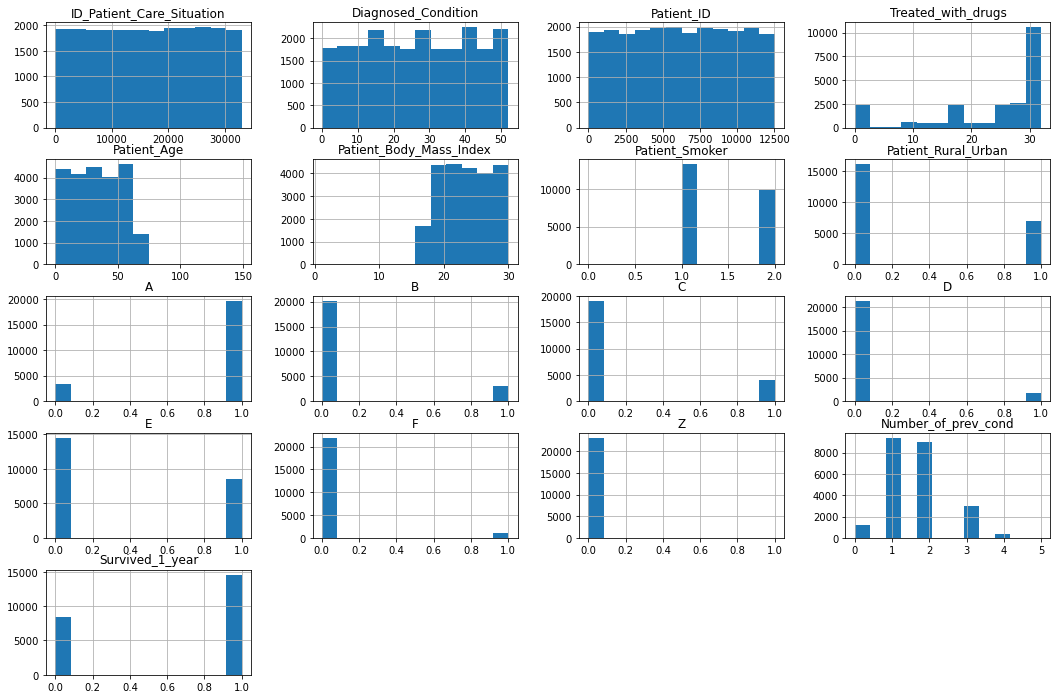

In [14]:
patient_data.hist(bins=12,figsize=(18,12))

In [15]:
patient_data_corr_new = patient_data.corr()
patient_data_corr_new.style.background_gradient(cmap="cool")

,ID_Patient_Care_Situation,Diagnosed_Condition,Patient_ID,Treated_with_drugs,Patient_Age,Patient_Body_Mass_Index,Patient_Smoker,Patient_Rural_Urban,A,B,C,D,E,F,Z,Number_of_prev_cond,Survived_1_year
ID_Patient_Care_Situation,1.000000,-0.007446,0.000235,0.004550,0.000304,-0.007259,-0.002166,-0.000333,-0.001261,0.004158,0.009425,-0.006928,-0.001042,0.007084,0.040983,0.005528,-0.004685
Diagnosed_Condition,-0.007446,1.000000,0.008315,0.009014,-0.008971,0.008305,0.000314,0.010335,-0.000683,0.003063,-0.003634,-0.008186,0.006056,0.005311,-0.041702,0.000351,-0.004450
Patient_ID,0.000235,0.008315,1.000000,-0.006419,0.014015,-0.023189,0.019407,-0.024088,-0.007778,-0.012431,-0.006833,-0.004973,-0.000406,0.007289,0.041227,-0.010044,-0.004214
Treated_with_drugs,0.004550,0.009014,-0.006419,1.000000,-0.006978,-0.002259,-0.011134,0.004932,-0.010878,-0.009131,-0.003466,-0.005012,-0.000786,0.009101,0.020700,-0.008868,-0.182782
Patient_Age,0.000304,-0.008971,0.014015,-0.006978,1.000000,-0.006560,0.274867,-0.005514,-0.012567,-0.011582,-0.010707,0.004541,-0.001239,0.007428,0.114038,-0.008833,-0.074934
Patient_Body_Mass_Index,-0.007259,0.008305,-0.023189,-0.002259,-0.006560,1.000000,0.025686,0.014156,0.006762,0.000848,-0.018060,-0.009257,-0.006431,-0.016045,-0.136708,-0.019537,-0.121844
Patient_Smoker,-0.002166,0.000314,0.019407,-0.011134,0.274867,0.025686,1.000000,-0.006458,0.002885,0.007021,-0.008295,0.011135,0.002894,-0.003340,-0.068261,0.002697,-0.254003
Patient_Rural_Urban,-0.000333,0.010335,-0.024088,0.004932,-0.005514,0.014156,-0.006458,1.000000,-0.003120,-0.003848,0.007015,0.002068,-0.013022,0.005187,-0.015590,-0.005558,-0.112767
A,-0.001261,-0.000683,-0.007778,-0.010878,-0.012567,0.006762,0.002885,-0.003120,1.000000,-0.000555,-0.011694,-0.023172,-0.028722,-0.013673,-0.056468,0.387512,-0.077930
B,0.004158,0.003063,-0.012431,-0.009131,-0.011582,0.000848,0.007021,-0.003848,-0.000555,1.000000,-0.010937,0.004339,-0.000686,-0.010889,-0.009135,0.388794,-0.054560


In [16]:
patient_data_features = patient_data.drop('Survived_1_year',axis=1)
patient_data_outputLabel = patient_data['Survived_1_year']
patient_data_features.head()

,ID_Patient_Care_Situation,Diagnosed_Condition,Patient_ID,Treated_with_drugs,Patient_Age,Patient_Body_Mass_Index,Patient_Smoker,Patient_Rural_Urban,A,B,C,D,E,F,Z,Number_of_prev_cond
0,22374,8,3333,31,56,18.479385,2,1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0
1,18164,5,5740,16,36,22.945566,2,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,6283,23,10446,31,48,27.510027,2,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,5339,51,12011,0,5,19.130976,1,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,33012,0,12513,32,128,1.348400,0,0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0


In [17]:
# define min max scaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
# transform data
scaled_patient_data_features = scaler.fit_transform(patient_data_features)
scaled_patient_data_features

array([[0.67769296, 0.15384615, 0.26626179, ..., 0.        , 0.        ,
        0.4       ],
       [0.55016358, 0.09615385, 0.45860636, ..., 0.        , 0.        ,
        0.2       ],
       [0.19026415, 0.44230769, 0.83466518, ..., 0.        , 0.        ,
        0.2       ],
       ...,
       [0.06558221, 0.46153846, 0.61291354, ..., 0.        , 0.        ,
        0.2       ],
       [0.95856052, 0.21153846, 0.46052421, ..., 0.        , 0.        ,
        0.4       ],
       [0.119502  , 0.40384615, 0.50063928, ..., 0.        , 0.        ,
        0.8       ]])

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(scaled_patient_data_features, patient_data_outputLabel, test_size=0.10, random_state=46)

In [19]:
X_train

array([[0.2226766 , 0.53846154, 0.31388844, ..., 0.        , 0.        ,
        0.6       ],
       [0.37353084, 0.86538462, 0.23237973, ..., 0.        , 0.        ,
        0.4       ],
       [0.95625833, 0.42307692, 0.01678121, ..., 0.        , 0.        ,
        0.2       ],
       ...,
       [0.18690173, 0.86538462, 0.21863513, ..., 0.        , 0.        ,
        0.6       ],
       [0.53380589, 0.59615385, 0.82675404, ..., 0.        , 0.        ,
        0.2       ],
       [0.23152187, 1.        , 0.18611156, ..., 0.        , 0.        ,
        0.2       ]])

In [20]:
# !pip install xgboost

In [21]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn import model_selection
from sklearn.utils import class_weight
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score
import pickle

In [22]:
def run_exps(X_train: pd.DataFrame , y_train: pd.DataFrame, X_test: pd.DataFrame, y_test: pd.DataFrame) -> pd.DataFrame:
    '''
    Lightweight script to test many models and find winners
    :param X_train: training split
    :param y_train: training target vector
    :param X_test: test split
    :param y_test: test target vector
    :return: DataFrame of predictions
    '''    
    dfs = []
    models = [
              ('LogReg', LogisticRegression(solver='liblinear')), 
              ('RF', RandomForestClassifier()),
              ('KNN', KNeighborsClassifier()),
              ('SVM', SVC()), 
              ('GNB', GaussianNB()),
              ('XGB', XGBClassifier())
            ]

    results = []
    names = []
    scoring = {'accuracy' : make_scorer(accuracy_score), 
           'precision' : make_scorer(precision_score),
           'recall' : make_scorer(recall_score), 
           'f1' : make_scorer(f1_score)}
    # scoring = ['f1_score', 'f1_weighted']
    target_names = ['Not survive','Survive']
    for name, model in models:
        kfold = model_selection.KFold(n_splits=5, shuffle=True, random_state=90210)
        cv_results = model_selection.cross_validate(model, X_train, y_train, cv=kfold, scoring=scoring)
        clf = model.fit(X_train, y_train)
        y_pred = clf.predict(X_test)
        print(name)
        print(classification_report(y_test, y_pred, target_names=target_names))
        #  print(confusion_matrix(y_test, y_pred, labels=target_names))

        results.append(cv_results)
        names.append(name)
        this_df = pd.DataFrame(cv_results)
        this_df['model'] = name
        dfs.append(this_df)
    final = pd.concat(dfs, ignore_index=True)
    return final

In [23]:
run_exps(X_train, y_train, X_test, y_test)

LogReg
              precision    recall  f1-score   support

 Not survive       0.64      0.43      0.52       886
     Survive       0.71      0.85      0.77      1424

    accuracy                           0.69      2310
   macro avg       0.67      0.64      0.64      2310
weighted avg       0.68      0.69      0.67      2310

RF
              precision    recall  f1-score   support

 Not survive       0.77      0.72      0.74       886
     Survive       0.83      0.86      0.85      1424

    accuracy                           0.81      2310
   macro avg       0.80      0.79      0.80      2310
weighted avg       0.81      0.81      0.81      2310

KNN
              precision    recall  f1-score   support

 Not survive       0.65      0.51      0.57       886
     Survive       0.73      0.83      0.78      1424

    accuracy                           0.71      2310
   macro avg       0.69      0.67      0.67      2310
weighted avg       0.70      0.71      0.70      2310

SVM
 

C:\Users\Public\DataScience\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


XGB
              precision    recall  f1-score   support

 Not survive       0.79      0.75      0.77       886
     Survive       0.85      0.88      0.86      1424

    accuracy                           0.83      2310
   macro avg       0.82      0.81      0.82      2310
weighted avg       0.83      0.83      0.83      2310



,fit_time,score_time,test_accuracy,test_precision,test_recall,test_f1,model
0,0.035934,0.009941,0.705628,0.734300,0.851064,0.788382,LogReg
1,0.037897,0.007979,0.699615,0.727626,0.845835,0.782290,LogReg
2,0.035904,0.007979,0.707481,0.727157,0.864170,0.789765,LogReg
3,0.046875,0.008976,0.697618,0.723537,0.841039,0.777876,LogReg
4,0.050864,0.008976,0.705557,0.718640,0.865868,0.785414,LogReg
5,2.229039,0.088795,0.825156,0.855426,0.876820,0.865991,RF
6,2.220064,0.089761,0.817701,0.849760,0.867697,0.858635,RF
7,2.255966,0.088761,0.825595,0.852574,0.877412,0.864814,RF
8,2.181168,0.093748,0.802502,0.829420,0.863966,0.846341,RF
9,2.266936,0.091757,0.825355,0.849418,0.874372,0.861714,RF


In [24]:
# As xgb is performing well in above experiment, we will choose xgb
xgb = XGBClassifier()
clf = xgb.fit(X_train, y_train)
clf

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

## Data loading, Preprocession and EDA on Test Data

In [25]:
# Test data
test_data = pd.read_csv('https://raw.githubusercontent.com/dphi-official/Datasets/master/pharma_data/Testing_set_begs.csv')
test_data.head()

,ID_Patient_Care_Situation,Diagnosed_Condition,Patient_ID,Treated_with_drugs,Patient_Age,Patient_Body_Mass_Index,Patient_Smoker,Patient_Rural_Urban,Patient_mental_condition,A,B,C,D,E,F,Z,Number_of_prev_cond
0,19150,40,3709,DX3,16,29.443894,NO,RURAL,Stable,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0
1,23216,52,986,DX6,24,26.836321,NO,URBAN,Stable,1.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0
2,11890,50,11821,DX4 DX5,63,25.523280,NO,RURAL,Stable,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0
3,7149,32,3292,DX6,42,27.171155,NO,URBAN,Stable,1.0,0.0,1.0,0.0,1.0,0.0,0.0,3.0
4,22845,20,9959,DX3,50,25.556192,NO,RURAL,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [26]:
# Patient_mental_condition column have only 1 value i.e stable
test_data.drop(['Patient_mental_condition'],inplace=True, axis=1)

In [27]:
# Import label encoder 
from sklearn import preprocessing
# label_encoder object knows how to understand word labels. 
label_encoder = preprocessing.LabelEncoder()
# Encode labels in column 'Country'. 
test_data['Treated_with_drugs']= label_encoder.fit_transform(test_data['Treated_with_drugs']) 
test_data['Patient_Smoker']= label_encoder.fit_transform(test_data['Patient_Smoker']) 
test_data['Patient_Rural_Urban']= label_encoder.fit_transform(test_data['Patient_Rural_Urban'])
test_data.head()

,ID_Patient_Care_Situation,Diagnosed_Condition,Patient_ID,Treated_with_drugs,Patient_Age,Patient_Body_Mass_Index,Patient_Smoker,Patient_Rural_Urban,A,B,C,D,E,F,Z,Number_of_prev_cond
0,19150,40,3709,24,16,29.443894,0,0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0
1,23216,52,986,31,24,26.836321,0,1,1.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0
2,11890,50,11821,29,63,25.523280,0,0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0
3,7149,32,3292,31,42,27.171155,0,1,1.0,0.0,1.0,0.0,1.0,0.0,0.0,3.0
4,22845,20,9959,24,50,25.556192,0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [28]:
# Replacing Nan with 0
[test_data[column].replace({np.nan: 0}, inplace=True) for column in test_data.columns if test_data[column].isna().sum()>0]

[]

In [29]:
# define min max scaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
# transform data
scaled_patient_data_features_test = scaler.fit_transform(test_data)
scaled_patient_data_features_test

array([[0.58073027, 0.76470588, 0.29655117, ..., 0.        , 0.        ,
        0.25      ],
       [0.70403955, 1.        , 0.07865888, ..., 0.        , 0.        ,
        0.25      ],
       [0.3605568 , 0.96078431, 0.94566696, ..., 0.        , 0.        ,
        0.25      ],
       ...,
       [0.36040517, 0.29411765, 0.91782028, ..., 0.        , 0.        ,
        0.        ],
       [0.7612058 , 0.96078431, 0.45434904, ..., 1.        , 0.        ,
        1.        ],
       [0.57178383, 0.98039216, 0.83307994, ..., 0.        , 0.        ,
        0.        ]])

In [30]:
# Prediction
y_pred = clf.predict(scaled_patient_data_features_test)
y_pred

array([1, 1, 1, ..., 1, 0, 0])

In [31]:
# Saving prediction to submission.csv
res = pd.DataFrame({'prediction': y_pred})  # prediction is nothing but the final predictions of your model on input features of your new unseen test data
res.to_csv("submission.csv", index = False)      # the csv file will be saved locally on the same location where this notebook is located.